### Building Models Using Sequential API

We have covered Sequential API and we have demonstrated standard pipeline to build, train, evaluate a model that carries 10-class classification task. 

This week we will come back to regression problem. The main differences are the fact that the output layer has a single neuron (since we only want to predict a single value) and uses no activation function in the end. In this case, in training the loss function is simply mean squared error. 

Let us build this using Sequential API first. 

In [ ]:
# library
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [ ]:
# data
housing = fetch_california_housing()

In [ ]:
# train, validate, and test
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [ ]:
# standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # What is training set?
X_valid = scaler.transform(X_valid) # What is validating set?
X_test = scaler.transform(X_test) # What is test set?

#### Sequential API

Let us use Sequential API to build a neural network model.

In [ ]:
# sequential API

# How many neurons does this network has?
# How many hidden layers does this network have?

model = tf.keras.models.Sequential([
     tf.keras.layers.Dense(30, activation=tf.nn.relu), 
     tf.keras.layers.Dense(1)
  ]) # softmax is designed for multi-class classification

In [ ]:
# compile
model.compile(
    loss='mean_squared_error', # Why do we use mean squared error?
    optimizer='sgd' # What is the difference between 
    # stochastic gradient descent (SGD) and gradient descent (GD)?
)

In [ ]:
# fit the model
history = model.fit(
    X_train, y_train, epochs=20,
    validation_data=(X_valid, y_valid)
    # Notice that we fill in X_valid and y_valid, why don't we put in 
    # X_test, y_test?
)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.2573 - val_loss: 0.5914
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5355 - val_loss: 0.4928
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5076 - val_loss: 0.4488
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4564 - val_loss: 0.4276
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4240 - val_loss: 0.4195
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4087 - val_loss: 0.4108
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3998 - val_loss: 0.3996
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3949 - val_loss: 0.3978
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3892 - val_loss: 0.3982
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3853 - val_loss: 0.3865

In [ ]:
# compute test set error
mse_test = model.evaluate(X_test, y_test)
mse_test

162/162 [==============================] - 0s 1ms/step - loss: 0.3722


0.3721841871738434

In [ ]:
# get an arbitrary new observation
X_new = X_test[:3]

In [ ]:
# predict using arbitrar X defined above
y_pred = model.predict(X_new)

In [ ]:
# check outcome
y_pred

array([[2.0838928],
       [3.287313 ],
       [1.4829155]], dtype=float32)

The Sequential API is quite easy to use. However, althrough Sequential models are extremely common, it is sometimes useful to build neural networks with more complex topologies, or with multiple inputs or outputs. For this purpose, we introduce Functional API. 

#### Performance

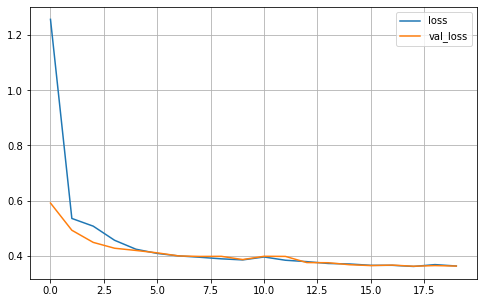

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# plot training and validating performance
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

### Functions in Python

A function is a block of code which only runs when it is called. You can pass data, known as parameters, into a function. A function can return data as a result.

```
def YOUR_FUNCTION(INPUT):
    return OUTPUT
```

In [ ]:
# build a basic function
def my_function():
  print("Hello from a function")

In [ ]:
# call a function that is pre-defined
my_function()

From above, we have seen a basic form of a python function. However, often times in practice we need to have the function execute some command based on an input. 

This input is called an argument. Let us see the following example.

In [ ]:
# define
def my_function(fname):
  print("Hi, " + fname + "! Good morning!")

In [ ]:
# try
my_function("Patrick")

Hi, Patrick! Good morning!


A function can take more than one arguments.

In [ ]:
# define
def my_function(first_name, last_name):
    print("Morning! " + first_name + " " + last_name)

In [ ]:
# run
my_function("James", "Bond")

Morning! James Bond


In machine learning, sometimes we default a parameter value in order to have the code produce some preliminary results. Let us introduce this default function.

In [ ]:
# define
def my_function(a = 3):
    print("The number you entered is " + str(a) + " and the next integer is " + str(a+1))

In [ ]:
# run
my_function() # this produce default input

The number you entered is 3 and the next integer is 4


In [ ]:
# run
my_function(2) # the input is now defined as "2"

The number you entered is 2 and the next integer is 3


A function can return an object as you desire. To do this, we can use the *return* syntax.

In [ ]:
# define
def my_function(a=3, b=2):
    return a+b**2

In [ ]:
# run
my_function() # What do you think would be the default result?

7

In [ ]:
# run
my_function(4,2) # What do you think the result is?

8

### Fine-Tuning Neural Network Hyperparameters

The flexibility of neural networks is also one of the main drawbacks: there are many hyperparameters to tweak. Not only can you use any imaginable network architecture, but even in a simple neural network you can change the number of layers drastically, the number of neurons per layer, the type of activation function to use in each layer, the weight initialization logic, and much more. How do we know what combination of hyperparameters is the best for your task?

One option is to try many different combinations of hyperparameters and see which one works best on the validation set (or use K-fold cross validation). 

In [ ]:
# define model
def build_model(n_hidden=1, n_neurons=30, learning_rate=0.001, input_shape=[8]):
    model = tf.keras.models.Sequential()

    # What type of API are we using for input layer?
    model.add(tf.keras.layers.InputLayer(input_shape=input_shape))

    # What type of API are we using for hidden layer?
    for layer in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))

    # Why do we set number of neurons (or units) to be 1 for this following layer?
    model.add(tf.keras.layers.Dense(1))

    # A gentle reminder question: What is the difference between 
    # stochastic gradient descent and gradient descent?
    optimizer = tf.keras.optimizers.SGD(lr=learning_rate)

    # Another gentle reminder question: Why do we use mse or mean squared error？
    model.compile(loss="mse", optimizer=optimizer)

    return model

Recall in Week 2 we introduced linear regression. In the code walk through, we used Sci-kit Learn library to import *LinearRegression()* function and we were able to fit the data using the *.fit()* method. 

This is the code we used in Week 2. 

```
from sklearn.linear_model import LinearRegression
lm = LinearRegression() # builds up model package 
lm.fit(X_train, y_train) # trains model using training x and y
```

Now we want to design a pipeline such that the entire *Tensorflow* objects can be thrown into the Sci-kit Learn framework. This is because Sci-kit Learn library provides nice cross-validation function and we want to take advantage of that function. 

To achieve this goal, we introduce a wrapper method. The syntax is *.wrappers* under Tensorflow Keras.

In [ ]:
# create a KerasRegressor based on the model defined above
keras_reg = tf.keras.wrappers.scikit_learn.KerasRegressor(build_model)

# comment:
# The KerasRegressor object is a think wrapper around the Keras model 
# built using build_model(). Since we did not specify any hyperparameters 
# when creating it, it will use the default hyperparameters we defined in 
# build_model(). This makes things convenient because we can now use 
# this object just like a regular Scikit-learn regressor. 
# In other words, we can use .fit(), .predict(), and all these concepts
# consistently as we discussed before.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  


In [ ]:
# fit the model
keras_reg.fit(X_train, y_train, epochs=10,
              validation_data=(X_valid, y_valid),
              callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 2.4956 - val_loss: 1.0730
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.9038 - val_loss: 0.7929
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7408 - val_loss: 0.7334
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6925 - val_loss: 0.6996
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6620 - val_loss: 0.6724
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6369 - val_loss: 0.6492
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6165 - val_loss: 0.6287
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5983 - val_loss: 0.6088
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5819 - val_loss: 0.5932
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5678 - val_loss: 0.5778

In [ ]:
# prediction on test set
y_test_pred = keras_reg.predict(X_test)

In [ ]:
# mean square error on test set
import numpy as np
rmse_test = (np.sum((y_test_pred - y_test) ** 2) / len(y_test)) ** 0.5
rmse_test 

# Question: how to interpret this?

# Answer: On the test set (observations the model has not seen before)
#         the educated guess from the model make predictions with error 
#         range to be about 

0.7602871518974966

Note that any extra parameter you pass to the *fit()* method will get passed to the underlying Keras model. Also note that the score will be the oppositie of the MSE because Scikit-Learn wants scores, not losses (i.e. higher should be better).

We do not want to train and evaluate a single model like this, though we want to train hundreds of variants and see which one perfoms best on the validation set. Since there are many hyperparameters, it is preferable to use a randomized search.

In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
np.arange(0, 40, 10)

array([ 0, 10, 20, 30])

In [ ]:
param_distribs = {
    "n_hidden": [0, 1, 3],
    "n_neurons": np.arange(0, 40, 10)[1:],
    "learning_rate": reciprocal(3e-4, 3e-2)
}

In [ ]:
# create randomized grid search
rnd_search_cv = RandomizedSearchCV(
    keras_reg, param_distributions=param_distribs,
    n_iter=10, cv=3)

In [ ]:
# fit the above randomized grid search function
rnd_search_cv.fit(X_train, y_train, epochs=10,
                  validation_data=(X_valid, y_valid),
                  callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])

# Go get a cup of a coffee! This may take a few minutes.

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
242/242 [==============================] - 1s 3ms/step - loss: 1.2299 - val_loss: 3.5621
Epoch 2/10
242/242 [==============================] - 0s 2ms/step - loss: 10.4047 - val_loss: 122.8528
Epoch 3/10
242/242 [==============================] - 0s 2ms/step - loss: 96.0350 - val_loss: 3745.5525
Epoch 4/10
242/242 [==============================] - 0s 2ms/step - loss: 5871.1348 - val_loss: 117391.8438
Epoch 5/10
242/242 [==============================] - 0s 2ms/step - loss: 602234.3125 - val_loss: 3581354.2500
Epoch 6/10
242/242 [==============================] - 0s 2ms/step - loss: 4107613.0000 - val_loss: 111472584.0000
Epoch 7/10
242/242 [==============================] - 1s 2ms/step - loss: 124005688.0000 - val_loss: 3483758336.0000
Epoch 8/10
242/242 [==============================] - 0s 2ms/step - loss: 8916257792.0000 - val_loss: 108371828736.0000
Epoch 9/10
242/242 [==============================] - 0s 2ms/step - loss: 54074744832.0000 - val_loss: 3153740169216.0000
E

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 2ms/step - loss: 1.8702 - val_loss: 27.9017
Epoch 2/10
242/242 [==============================] - 0s 2ms/step - loss: 278.1375 - val_loss: 1825.5867
Epoch 3/10
242/242 [==============================] - 0s 2ms/step - loss: 28783.2812 - val_loss: 119612.7656
Epoch 4/10
242/242 [==============================] - 0s 2ms/step - loss: 1178597.3750 - val_loss: 7998366.5000
Epoch 5/10
242/242 [==============================] - 0s 2ms/step - loss: 25339422.0000 - val_loss: 528441120.0000
Epoch 6/10
242/242 [==============================] - 0s 2ms/step - loss: 555287424.0000 - val_loss: 33968760832.0000
Epoch 7/10
242/242 [==============================] - 0s 2ms/step - loss: 12792151040.0000 - val_loss: 2065856593920.0000
Epoch 8/10
242/242 [==============================] - 0s 2ms/step - loss: 26725530468352.0000 - val_loss: 135836200861696.0000
Epoch 9/10
242/242 [==============================] - 0s 2ms/step - loss: 793427629309952.0000 - val_l

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 4.1096 - val_loss: 0.5551
Epoch 2/10
242/242 [==============================] - 0s 2ms/step - loss: 0.7419 - val_loss: 0.5725
Epoch 3/10
242/242 [==============================] - 0s 2ms/step - loss: 0.5610 - val_loss: 1.3102
Epoch 4/10
242/242 [==============================] - 0s 2ms/step - loss: 0.5542 - val_loss: 0.5891
Epoch 5/10
242/242 [==============================] - 0s 2ms/step - loss: 0.5573 - val_loss: 0.5414
Epoch 6/10
242/242 [==============================] - 0s 2ms/step - loss: 1.3064 - val_loss: 1.0266
Epoch 7/10
242/242 [==============================] - 0s 2ms/step - loss: 0.6080 - val_loss: 0.5354
Epoch 8/10
242/242 [==============================] - 0s 2ms/step - loss: 0.6970 - val_loss: 0.7310
Epoch 9/10
242/242 [==============================] - 0s 2ms/step - loss: 0.6106 - val_loss: 0.5769
Epoch 10/10
121/121 [==============================] - 0s 1ms/step - loss: 0.5607
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 2ms/step - loss: 2.0659 - val_loss: 2.1579
Epoch 2/10
242/242 [==============================] - 0s 2ms/step - loss: 2.1273 - val_loss: 7.5324
Epoch 3/10
242/242 [==============================] - 0s 2ms/step - loss: 4.9597 - val_loss: 33.3548
Epoch 4/10
242/242 [==============================] - 0s 2ms/step - loss: 24.4251 - val_loss: 139.4403
Epoch 5/10
242/242 [==============================] - 0s 2ms/step - loss: 73.7983 - val_loss: 578.5710
Epoch 6/10
242/242 [==============================] - 0s 2ms/step - loss: 370.3467 - val_loss: 2439.9778
Epoch 7/10
242/242 [==============================] - 0s 2ms/step - loss: 2250.3020 - val_loss: 10254.6836
Epoch 8/10
242/242 [==============================] - 1s 2ms/step - loss: 8459.5820 - val_loss: 43096.0430
Epoch 9/10
242/242 [==============================] - 0s 2ms/step - loss: 22070.4355 - val_loss: 183203.4531
Epoch 10/10
121/121 [==============================] - 0s 1ms/step - loss: 1

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 2ms/step - loss: 1.7175 - val_loss: 0.7542
Epoch 2/10
242/242 [==============================] - 1s 2ms/step - loss: 0.7901 - val_loss: 0.6989
Epoch 3/10
242/242 [==============================] - 0s 2ms/step - loss: 0.6323 - val_loss: 0.6563
Epoch 4/10
242/242 [==============================] - 0s 2ms/step - loss: 0.6069 - val_loss: 0.6052
Epoch 5/10
242/242 [==============================] - 0s 2ms/step - loss: 0.5794 - val_loss: 0.5631
Epoch 6/10
242/242 [==============================] - 0s 2ms/step - loss: 0.5606 - val_loss: 0.5578
Epoch 7/10
242/242 [==============================] - 0s 2ms/step - loss: 0.5656 - val_loss: 0.5464
Epoch 8/10
242/242 [==============================] - 0s 2ms/step - loss: 0.5478 - val_loss: 0.5399
Epoch 9/10
242/242 [==============================] - 0s 2ms/step - loss: 0.5477 - val_loss: 0.5421
Epoch 10/10
121/121 [==============================] - 0s 1ms/step - loss: 0.5601


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
242/242 [==============================] - 1s 2ms/step - loss: 2.0612 - val_loss: 0.6865
Epoch 2/10
242/242 [==============================] - 0s 2ms/step - loss: 0.5635 - val_loss: 0.5357
Epoch 3/10
242/242 [==============================] - 0s 2ms/step - loss: 0.5382 - val_loss: 0.5352
Epoch 4/10
242/242 [==============================] - 0s 2ms/step - loss: 0.5361 - val_loss: 0.5366
Epoch 5/10
242/242 [==============================] - 0s 2ms/step - loss: 0.5373 - val_loss: 0.5406
Epoch 6/10
242/242 [==============================] - 0s 2ms/step - loss: 0.5523 - val_loss: 0.5431
Epoch 7/10
242/242 [==============================] - 0s 2ms/step - loss: 0.5278 - val_loss: 0.5594
Epoch 8/10
242/242 [==============================] - 0s 2ms/step - loss: 0.5394 - val_loss: 0.5441
Epoch 9/10
242/242 [==============================] - 0s 2ms/step - loss: 0.5305 - val_loss: 0.5396
Epoch 10/10
121/121 [==============================] - 0s 1ms/step - loss: 0.5628


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
242/242 [==============================] - 1s 2ms/step - loss: 3.1310 - val_loss: 1.2839
Epoch 2/10
242/242 [==============================] - 0s 2ms/step - loss: 0.9883 - val_loss: 0.7815
Epoch 3/10
242/242 [==============================] - 0s 2ms/step - loss: 0.7474 - val_loss: 0.7186
Epoch 4/10
242/242 [==============================] - 0s 2ms/step - loss: 0.6991 - val_loss: 0.6849
Epoch 5/10
242/242 [==============================] - 1s 2ms/step - loss: 0.6691 - val_loss: 0.6623
Epoch 6/10
242/242 [==============================] - 0s 2ms/step - loss: 0.6461 - val_loss: 0.6457
Epoch 7/10
242/242 [==============================] - 0s 2ms/step - loss: 0.6315 - val_loss: 0.6250
Epoch 8/10
242/242 [==============================] - 0s 2ms/step - loss: 0.6137 - val_loss: 0.6126
Epoch 9/10
242/242 [==============================] - 0s 2ms/step - loss: 0.6017 - val_loss: 0.6002
Epoch 10/10
121/121 [==============================] - 0s 1ms/step - loss: 0.5949
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 2ms/step - loss: 3.3246 - val_loss: 1.2827
Epoch 2/10
242/242 [==============================] - 0s 2ms/step - loss: 0.9616 - val_loss: 0.7210
Epoch 3/10
242/242 [==============================] - 0s 2ms/step - loss: 0.6947 - val_loss: 0.6662
Epoch 4/10
242/242 [==============================] - 0s 2ms/step - loss: 0.6554 - val_loss: 0.6369
Epoch 5/10
242/242 [==============================] - 0s 2ms/step - loss: 0.6314 - val_loss: 0.6181
Epoch 6/10
242/242 [==============================] - 0s 2ms/step - loss: 0.6168 - val_loss: 0.6046
Epoch 7/10
242/242 [==============================] - 0s 2ms/step - loss: 0.6022 - val_loss: 0.5910
Epoch 8/10
242/242 [==============================] - 0s 2ms/step - loss: 0.5914 - val_loss: 0.5822
Epoch 9/10
242/242 [==============================] - 0s 2ms/step - loss: 0.5825 - val_loss: 0.5718
Epoch 10/10
121/121 [==============================] - 0s 1ms/step - loss: 0.5661


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
242/242 [==============================] - 1s 2ms/step - loss: 3.1418 - val_loss: 1.2867
Epoch 2/10
242/242 [==============================] - 0s 2ms/step - loss: 0.8086 - val_loss: 0.7666
Epoch 3/10
242/242 [==============================] - 0s 2ms/step - loss: 0.6083 - val_loss: 0.6902
Epoch 4/10
242/242 [==============================] - 0s 2ms/step - loss: 0.5806 - val_loss: 0.6591
Epoch 5/10
242/242 [==============================] - 0s 2ms/step - loss: 0.5675 - val_loss: 0.6404
Epoch 6/10
242/242 [==============================] - 0s 2ms/step - loss: 0.5620 - val_loss: 0.6265
Epoch 7/10
242/242 [==============================] - 0s 2ms/step - loss: 0.5546 - val_loss: 0.6191
Epoch 8/10
242/242 [==============================] - 0s 2ms/step - loss: 0.5527 - val_loss: 0.6099
Epoch 9/10
242/242 [==============================] - 0s 2ms/step - loss: 0.5478 - val_loss: 0.6023
Epoch 10/10
121/121 [==============================] - 0s 1ms/step - loss: 0.6157
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 2ms/step - loss: 0.8996 - val_loss: 0.6533
Epoch 2/10
242/242 [==============================] - 1s 2ms/step - loss: 0.6326 - val_loss: 0.9220
Epoch 3/10
242/242 [==============================] - 1s 2ms/step - loss: 0.7429 - val_loss: 0.4891
Epoch 4/10
242/242 [==============================] - 1s 2ms/step - loss: 0.4935 - val_loss: 0.4649
Epoch 5/10
242/242 [==============================] - 1s 2ms/step - loss: 0.4478 - val_loss: 0.4412
Epoch 6/10
242/242 [==============================] - 1s 2ms/step - loss: 0.4258 - val_loss: 0.4275
Epoch 7/10
242/242 [==============================] - 1s 2ms/step - loss: 0.4180 - val_loss: 0.4168
Epoch 8/10
242/242 [==============================] - 1s 2ms/step - loss: 0.4119 - val_loss: 0.4165
Epoch 9/10
242/242 [==============================] - 1s 2ms/step - loss: 0.4124 - val_loss: 0.4098
Epoch 10/10
121/121 [==============================] - 0s 1ms/step - loss: 0.4118


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
242/242 [==============================] - 1s 3ms/step - loss: 1.1074 - val_loss: 0.6103
Epoch 2/10
242/242 [==============================] - 0s 2ms/step - loss: 0.5491 - val_loss: 0.5075
Epoch 3/10
242/242 [==============================] - 1s 2ms/step - loss: 0.4832 - val_loss: 0.4685
Epoch 4/10
242/242 [==============================] - 1s 2ms/step - loss: 0.4545 - val_loss: 0.4464
Epoch 5/10
242/242 [==============================] - 1s 2ms/step - loss: 0.4389 - val_loss: 0.4391
Epoch 6/10
242/242 [==============================] - 0s 2ms/step - loss: 0.4327 - val_loss: 0.4305
Epoch 7/10
242/242 [==============================] - 1s 2ms/step - loss: 0.4267 - val_loss: 0.4235
Epoch 8/10
242/242 [==============================] - 1s 2ms/step - loss: 0.4278 - val_loss: 0.4270
Epoch 9/10
242/242 [==============================] - 1s 2ms/step - loss: 0.4206 - val_loss: 0.4186
Epoch 10/10
121/121 [==============================] - 0s 1ms/step - loss: 0.4097
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 2ms/step - loss: 1.0912 - val_loss: 0.9309
Epoch 2/10
242/242 [==============================] - 1s 2ms/step - loss: 0.6246 - val_loss: 0.7037
Epoch 3/10
242/242 [==============================] - 0s 2ms/step - loss: 0.5020 - val_loss: 0.4975
Epoch 4/10
242/242 [==============================] - 0s 2ms/step - loss: 0.4528 - val_loss: 0.4590
Epoch 5/10
242/242 [==============================] - 0s 2ms/step - loss: 0.4384 - val_loss: 0.4517
Epoch 6/10
242/242 [==============================] - 0s 2ms/step - loss: 0.4475 - val_loss: 0.6397
Epoch 7/10
242/242 [==============================] - 1s 2ms/step - loss: 0.4772 - val_loss: 0.4530
Epoch 8/10
242/242 [==============================] - 1s 2ms/step - loss: 0.4286 - val_loss: 0.4295
Epoch 9/10
242/242 [==============================] - 1s 2ms/step - loss: 0.4120 - val_loss: 0.4228
Epoch 10/10
121/121 [==============================] - 0s 1ms/step - loss: 0.4364


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
242/242 [==============================] - 1s 2ms/step - loss: 1.0783 - val_loss: 0.7313
Epoch 2/10
242/242 [==============================] - 0s 2ms/step - loss: 0.7457 - val_loss: 22.2423
Epoch 3/10
242/242 [==============================] - 0s 2ms/step - loss: 30.2497 - val_loss: 557.6595
Epoch 4/10
242/242 [==============================] - 0s 2ms/step - loss: 1535.2266 - val_loss: 15487.5684
Epoch 5/10
242/242 [==============================] - 0s 2ms/step - loss: 4196.1646 - val_loss: 428264.3750
Epoch 6/10
242/242 [==============================] - 0s 2ms/step - loss: 916961.3750 - val_loss: 11705624.0000
Epoch 7/10
242/242 [==============================] - 0s 2ms/step - loss: 3275587.7500 - val_loss: 327791328.0000
Epoch 8/10
242/242 [==============================] - 0s 2ms/step - loss: 771717440.0000 - val_loss: 8978358272.0000
Epoch 9/10
242/242 [==============================] - 0s 2ms/step - loss: 8059041280.0000 - val_loss: 249364103168.0000
Epoch 10/10
121/12

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
242/242 [==============================] - 1s 2ms/step - loss: 1.0102 - val_loss: 6.0897
Epoch 2/10
242/242 [==============================] - 0s 2ms/step - loss: 1.5922 - val_loss: 48.4175
Epoch 3/10
242/242 [==============================] - 0s 2ms/step - loss: 520.9161 - val_loss: 825.4350
Epoch 4/10
242/242 [==============================] - 0s 2ms/step - loss: 151.9227 - val_loss: 13309.2129
Epoch 5/10
242/242 [==============================] - 0s 2ms/step - loss: 5869.3237 - val_loss: 219484.0312
Epoch 6/10
242/242 [==============================] - 0s 2ms/step - loss: 1737626.8750 - val_loss: 3505030.0000
Epoch 7/10
242/242 [==============================] - 0s 2ms/step - loss: 25001408.0000 - val_loss: 58466004.0000
Epoch 8/10
242/242 [==============================] - 0s 2ms/step - loss: 326239360.0000 - val_loss: 989168896.0000
Epoch 9/10
242/242 [==============================] - 0s 2ms/step - loss: 1114880896.0000 - val_loss: 16282927104.0000
Epoch 10/10
121/121 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 2ms/step - loss: 0.9020 - val_loss: 0.6360
Epoch 2/10
242/242 [==============================] - 0s 2ms/step - loss: 0.6525 - val_loss: 0.6541
Epoch 3/10
242/242 [==============================] - 0s 2ms/step - loss: 0.6526 - val_loss: 0.5332
Epoch 4/10
242/242 [==============================] - 0s 2ms/step - loss: 0.5539 - val_loss: 0.6913
Epoch 5/10
242/242 [==============================] - 0s 2ms/step - loss: 0.9716 - val_loss: 0.5684
Epoch 6/10
242/242 [==============================] - 0s 2ms/step - loss: 0.8999 - val_loss: 0.5561
Epoch 7/10
242/242 [==============================] - 0s 2ms/step - loss: 0.6061 - val_loss: 0.5203
Epoch 8/10
242/242 [==============================] - 0s 2ms/step - loss: 0.5612 - val_loss: 0.6125
Epoch 9/10
242/242 [==============================] - 0s 2ms/step - loss: 0.5457 - val_loss: 0.6229
Epoch 10/10
121/121 [==============================] - 0s 1ms/step - loss: 0.7879


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
242/242 [==============================] - 1s 2ms/step - loss: 1.3680 - val_loss: 1.0469
Epoch 2/10
242/242 [==============================] - 0s 2ms/step - loss: 0.9771 - val_loss: 4.1577
Epoch 3/10
242/242 [==============================] - 0s 2ms/step - loss: 3.3810 - val_loss: 0.6930
Epoch 4/10
242/242 [==============================] - 0s 2ms/step - loss: 0.5798 - val_loss: 0.5271
Epoch 5/10
242/242 [==============================] - 1s 2ms/step - loss: 0.4984 - val_loss: 0.4821
Epoch 6/10
242/242 [==============================] - 0s 2ms/step - loss: 0.4725 - val_loss: 0.4685
Epoch 7/10
242/242 [==============================] - 1s 2ms/step - loss: 0.4555 - val_loss: 0.4482
Epoch 8/10
242/242 [==============================] - 1s 2ms/step - loss: 0.4431 - val_loss: 0.4360
Epoch 9/10
242/242 [==============================] - 1s 2ms/step - loss: 0.4373 - val_loss: 0.4307
Epoch 10/10
121/121 [==============================] - 0s 1ms/step - loss: 0.4107


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
242/242 [==============================] - 1s 3ms/step - loss: 1.5167 - val_loss: 0.8442
Epoch 2/10
242/242 [==============================] - 1s 2ms/step - loss: 0.7200 - val_loss: 0.6509
Epoch 3/10
242/242 [==============================] - 1s 2ms/step - loss: 0.6174 - val_loss: 0.5943
Epoch 4/10
242/242 [==============================] - 1s 2ms/step - loss: 0.5635 - val_loss: 0.5417
Epoch 5/10
242/242 [==============================] - 1s 2ms/step - loss: 0.5264 - val_loss: 0.5143
Epoch 6/10
242/242 [==============================] - 0s 2ms/step - loss: 0.4974 - val_loss: 0.4855
Epoch 7/10
242/242 [==============================] - 1s 2ms/step - loss: 0.4761 - val_loss: 0.4717
Epoch 8/10
242/242 [==============================] - 0s 2ms/step - loss: 0.4624 - val_loss: 0.4572
Epoch 9/10
242/242 [==============================] - 1s 2ms/step - loss: 0.4514 - val_loss: 0.4478
Epoch 10/10
121/121 [==============================] - 0s 1ms/step - loss: 0.4365


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
242/242 [==============================] - 1s 3ms/step - loss: 1.0925 - val_loss: 0.6402
Epoch 2/10
242/242 [==============================] - 1s 2ms/step - loss: 0.5884 - val_loss: 0.5836
Epoch 3/10
242/242 [==============================] - 1s 2ms/step - loss: 0.5395 - val_loss: 0.5325
Epoch 4/10
242/242 [==============================] - 1s 2ms/step - loss: 0.5046 - val_loss: 0.4978
Epoch 5/10
242/242 [==============================] - 1s 2ms/step - loss: 0.4813 - val_loss: 0.4884
Epoch 6/10
242/242 [==============================] - 1s 2ms/step - loss: 0.4654 - val_loss: 0.4691
Epoch 7/10
242/242 [==============================] - 1s 2ms/step - loss: 0.4513 - val_loss: 0.4538
Epoch 8/10
242/242 [==============================] - 1s 2ms/step - loss: 0.4415 - val_loss: 0.4458
Epoch 9/10
242/242 [==============================] - 1s 2ms/step - loss: 0.4318 - val_loss: 0.4399
Epoch 10/10
121/121 [==============================] - 0s 2ms/step - loss: 0.4526
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 1.5320 - val_loss: 1.2038
Epoch 2/10
242/242 [==============================] - 1s 2ms/step - loss: 0.9468 - val_loss: 0.9188
Epoch 3/10
242/242 [==============================] - 0s 2ms/step - loss: 0.7485 - val_loss: 0.5723
Epoch 4/10
242/242 [==============================] - 0s 2ms/step - loss: 0.5497 - val_loss: 0.5363
Epoch 5/10
242/242 [==============================] - 0s 2ms/step - loss: 0.5193 - val_loss: 0.5121
Epoch 6/10
242/242 [==============================] - 0s 2ms/step - loss: 0.4995 - val_loss: 0.4918
Epoch 7/10
242/242 [==============================] - 1s 2ms/step - loss: 0.4845 - val_loss: 0.4790
Epoch 8/10
242/242 [==============================] - 0s 2ms/step - loss: 0.4726 - val_loss: 0.4714
Epoch 9/10
242/242 [==============================] - 0s 2ms/step - loss: 0.4636 - val_loss: 0.4633
Epoch 10/10
121/121 [==============================] - 0s 1ms/step - loss: 0.4450


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
242/242 [==============================] - 1s 3ms/step - loss: 1.3086 - val_loss: 0.8429
Epoch 2/10
242/242 [==============================] - 1s 2ms/step - loss: 0.6824 - val_loss: 0.6210
Epoch 3/10
242/242 [==============================] - 1s 2ms/step - loss: 0.5735 - val_loss: 0.5609
Epoch 4/10
242/242 [==============================] - 1s 2ms/step - loss: 0.5301 - val_loss: 0.5266
Epoch 5/10
242/242 [==============================] - 1s 2ms/step - loss: 0.5048 - val_loss: 0.5052
Epoch 6/10
242/242 [==============================] - 1s 2ms/step - loss: 0.4888 - val_loss: 0.4913
Epoch 7/10
242/242 [==============================] - 1s 2ms/step - loss: 0.4782 - val_loss: 0.4772
Epoch 8/10
242/242 [==============================] - 1s 2ms/step - loss: 0.4687 - val_loss: 0.4677
Epoch 9/10
242/242 [==============================] - 1s 2ms/step - loss: 0.4613 - val_loss: 0.4602
Epoch 10/10
121/121 [==============================] - 0s 1ms/step - loss: 0.4573


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
242/242 [==============================] - 1s 2ms/step - loss: 1.2706 - val_loss: 0.7551
Epoch 2/10
242/242 [==============================] - 1s 2ms/step - loss: 0.6748 - val_loss: 0.6620
Epoch 3/10
242/242 [==============================] - 1s 2ms/step - loss: 0.6017 - val_loss: 0.6101
Epoch 4/10
242/242 [==============================] - 1s 2ms/step - loss: 0.5603 - val_loss: 0.5717
Epoch 5/10
242/242 [==============================] - 1s 2ms/step - loss: 0.5299 - val_loss: 0.5440
Epoch 6/10
242/242 [==============================] - 1s 2ms/step - loss: 0.5070 - val_loss: 0.5210
Epoch 7/10
242/242 [==============================] - 1s 2ms/step - loss: 0.4904 - val_loss: 0.5006
Epoch 8/10
242/242 [==============================] - 1s 2ms/step - loss: 0.4740 - val_loss: 0.4822
Epoch 9/10
242/242 [==============================] - 1s 3ms/step - loss: 0.4629 - val_loss: 0.4726
Epoch 10/10
121/121 [==============================] - 0s 1ms/step - loss: 0.4725
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 1.7770 - val_loss: 0.9756
Epoch 2/10
242/242 [==============================] - 1s 2ms/step - loss: 0.8746 - val_loss: 0.8420
Epoch 3/10
242/242 [==============================] - 1s 3ms/step - loss: 0.7748 - val_loss: 0.7733
Epoch 4/10
242/242 [==============================] - 1s 2ms/step - loss: 0.7242 - val_loss: 0.7322
Epoch 5/10
242/242 [==============================] - 1s 2ms/step - loss: 0.6915 - val_loss: 0.7090
Epoch 6/10
242/242 [==============================] - 1s 2ms/step - loss: 0.6684 - val_loss: 0.6844
Epoch 7/10
242/242 [==============================] - 1s 2ms/step - loss: 0.6499 - val_loss: 0.6657
Epoch 8/10
242/242 [==============================] - 1s 2ms/step - loss: 0.6349 - val_loss: 0.6504
Epoch 9/10
242/242 [==============================] - 1s 2ms/step - loss: 0.6215 - val_loss: 0.6363
Epoch 10/10
121/121 [==============================] - 0s 1ms/step - loss: 0.6190


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
242/242 [==============================] - 1s 3ms/step - loss: 3.3834 - val_loss: 1.4309
Epoch 2/10
242/242 [==============================] - 1s 3ms/step - loss: 1.1787 - val_loss: 1.0045
Epoch 3/10
242/242 [==============================] - 1s 2ms/step - loss: 0.9275 - val_loss: 0.8546
Epoch 4/10
242/242 [==============================] - 1s 2ms/step - loss: 0.8142 - val_loss: 0.7765
Epoch 5/10
242/242 [==============================] - 1s 2ms/step - loss: 0.7569 - val_loss: 0.7309
Epoch 6/10
242/242 [==============================] - 1s 2ms/step - loss: 0.7217 - val_loss: 0.7087
Epoch 7/10
242/242 [==============================] - 1s 2ms/step - loss: 0.7041 - val_loss: 0.6910
Epoch 8/10
242/242 [==============================] - 1s 2ms/step - loss: 0.6897 - val_loss: 0.6786
Epoch 9/10
242/242 [==============================] - 1s 2ms/step - loss: 0.6766 - val_loss: 0.6687
Epoch 10/10
121/121 [==============================] - 0s 1ms/step - loss: 0.6499


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
242/242 [==============================] - 1s 3ms/step - loss: 2.7111 - val_loss: 1.4395
Epoch 2/10
242/242 [==============================] - 1s 2ms/step - loss: 1.2264 - val_loss: 1.0490
Epoch 3/10
242/242 [==============================] - 1s 2ms/step - loss: 0.9360 - val_loss: 0.8673
Epoch 4/10
242/242 [==============================] - 1s 2ms/step - loss: 0.8023 - val_loss: 0.7762
Epoch 5/10
242/242 [==============================] - 1s 2ms/step - loss: 0.7243 - val_loss: 0.7187
Epoch 6/10
242/242 [==============================] - 1s 3ms/step - loss: 0.6745 - val_loss: 0.6747
Epoch 7/10
242/242 [==============================] - 1s 3ms/step - loss: 0.6404 - val_loss: 0.6465
Epoch 8/10
242/242 [==============================] - 1s 3ms/step - loss: 0.6161 - val_loss: 0.6258
Epoch 9/10
242/242 [==============================] - 1s 2ms/step - loss: 0.5979 - val_loss: 0.6062
Epoch 10/10
121/121 [==============================] - 0s 1ms/step - loss: 0.6058


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
242/242 [==============================] - 1s 3ms/step - loss: 2.9038 - val_loss: 1.5522
Epoch 2/10
242/242 [==============================] - 1s 2ms/step - loss: 1.3495 - val_loss: 1.1198
Epoch 3/10
242/242 [==============================] - 1s 2ms/step - loss: 1.0681 - val_loss: 0.9516
Epoch 4/10
242/242 [==============================] - 1s 2ms/step - loss: 0.9165 - val_loss: 0.8492
Epoch 5/10
242/242 [==============================] - 1s 3ms/step - loss: 0.8235 - val_loss: 0.7802
Epoch 6/10
242/242 [==============================] - 1s 3ms/step - loss: 0.7621 - val_loss: 0.7364
Epoch 7/10
242/242 [==============================] - 1s 2ms/step - loss: 0.7181 - val_loss: 0.7018
Epoch 8/10
242/242 [==============================] - 1s 3ms/step - loss: 0.6872 - val_loss: 0.6781
Epoch 9/10
242/242 [==============================] - 1s 2ms/step - loss: 0.6666 - val_loss: 0.6617
Epoch 10/10
121/121 [==============================] - 0s 1ms/step - loss: 0.6427
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


242/242 [==============================] - 1s 3ms/step - loss: 2.9397 - val_loss: 1.2545
Epoch 2/10
242/242 [==============================] - 1s 2ms/step - loss: 1.1397 - val_loss: 1.0877
Epoch 3/10
242/242 [==============================] - 1s 2ms/step - loss: 0.8957 - val_loss: 0.7801
Epoch 4/10
242/242 [==============================] - 1s 2ms/step - loss: 0.7551 - val_loss: 0.7117
Epoch 5/10
242/242 [==============================] - 1s 2ms/step - loss: 0.6948 - val_loss: 0.6693
Epoch 6/10
242/242 [==============================] - 1s 2ms/step - loss: 0.6537 - val_loss: 0.6407
Epoch 7/10
242/242 [==============================] - 1s 2ms/step - loss: 0.6250 - val_loss: 0.6133
Epoch 8/10
242/242 [==============================] - 1s 2ms/step - loss: 0.6016 - val_loss: 0.5914
Epoch 9/10
242/242 [==============================] - 1s 2ms/step - loss: 0.5824 - val_loss: 0.5742
Epoch 10/10
121/121 [==============================] - 0s 1ms/step - loss: 0.5560


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
242/242 [==============================] - 1s 3ms/step - loss: 2.2008 - val_loss: 1.1773
Epoch 2/10
242/242 [==============================] - 1s 2ms/step - loss: 0.9422 - val_loss: 0.8600
Epoch 3/10
242/242 [==============================] - 1s 2ms/step - loss: 0.7658 - val_loss: 0.7714
Epoch 4/10
242/242 [==============================] - 1s 2ms/step - loss: 0.7116 - val_loss: 0.7360
Epoch 5/10
242/242 [==============================] - 1s 2ms/step - loss: 0.6839 - val_loss: 0.7126
Epoch 6/10
242/242 [==============================] - 1s 2ms/step - loss: 0.6635 - val_loss: 0.6904
Epoch 7/10
242/242 [==============================] - 1s 2ms/step - loss: 0.6446 - val_loss: 0.6707
Epoch 8/10
242/242 [==============================] - 1s 2ms/step - loss: 0.6283 - val_loss: 0.6540
Epoch 9/10
242/242 [==============================] - 1s 2ms/step - loss: 0.6132 - val_loss: 0.6392
Epoch 10/10
121/121 [==============================] - 0s 1ms/step - loss: 0.6121


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
242/242 [==============================] - 1s 2ms/step - loss: 1.5995 - val_loss: 0.6676
Epoch 2/10
242/242 [==============================] - 1s 2ms/step - loss: 0.5679 - val_loss: 0.5352
Epoch 3/10
242/242 [==============================] - 0s 2ms/step - loss: 0.5065 - val_loss: 0.4931
Epoch 4/10
242/242 [==============================] - 1s 2ms/step - loss: 0.4766 - val_loss: 0.4692
Epoch 5/10
242/242 [==============================] - 1s 2ms/step - loss: 0.4561 - val_loss: 0.4521
Epoch 6/10
242/242 [==============================] - 1s 2ms/step - loss: 0.4392 - val_loss: 0.4376
Epoch 7/10
242/242 [==============================] - 1s 2ms/step - loss: 0.4288 - val_loss: 0.4248
Epoch 8/10
242/242 [==============================] - 1s 2ms/step - loss: 0.4214 - val_loss: 0.4205
Epoch 9/10
242/242 [==============================] - 1s 2ms/step - loss: 0.4162 - val_loss: 0.4215
Epoch 10/10
121/121 [==============================] - 0s 1ms/step - loss: 0.4166


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
242/242 [==============================] - 1s 3ms/step - loss: 0.9287 - val_loss: 0.6408
Epoch 2/10
242/242 [==============================] - 1s 2ms/step - loss: 0.5426 - val_loss: 0.4999
Epoch 3/10
242/242 [==============================] - 1s 2ms/step - loss: 0.4810 - val_loss: 0.4742
Epoch 4/10
242/242 [==============================] - 1s 2ms/step - loss: 0.4628 - val_loss: 0.4587
Epoch 5/10
242/242 [==============================] - 1s 2ms/step - loss: 0.4523 - val_loss: 0.4513
Epoch 6/10
242/242 [==============================] - 1s 2ms/step - loss: 0.4442 - val_loss: 0.4444
Epoch 7/10
242/242 [==============================] - 1s 2ms/step - loss: 0.4379 - val_loss: 0.4477
Epoch 8/10
242/242 [==============================] - 1s 2ms/step - loss: 0.4331 - val_loss: 0.4332
Epoch 9/10
242/242 [==============================] - 1s 2ms/step - loss: 0.4284 - val_loss: 0.4350
Epoch 10/10
121/121 [==============================] - 0s 1ms/step - loss: 0.4126


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
242/242 [==============================] - 1s 3ms/step - loss: 1.0529 - val_loss: 0.7808
Epoch 2/10
242/242 [==============================] - 1s 2ms/step - loss: 0.6617 - val_loss: 0.5978
Epoch 3/10
242/242 [==============================] - 1s 2ms/step - loss: 0.5552 - val_loss: 0.5434
Epoch 4/10
242/242 [==============================] - 1s 2ms/step - loss: 0.5148 - val_loss: 0.5130
Epoch 5/10
242/242 [==============================] - 1s 2ms/step - loss: 0.4936 - val_loss: 0.4792
Epoch 6/10
242/242 [==============================] - 1s 2ms/step - loss: 0.4535 - val_loss: 0.4502
Epoch 7/10
242/242 [==============================] - 0s 2ms/step - loss: 0.4414 - val_loss: 0.4430
Epoch 8/10
242/242 [==============================] - 1s 2ms/step - loss: 0.4436 - val_loss: 0.4397
Epoch 9/10
242/242 [==============================] - 0s 2ms/step - loss: 0.4241 - val_loss: 0.4350
Epoch 10/10
121/121 [==============================] - 0s 1ms/step - loss: 0.4407
Epoch 1/10
363/363

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7ff13dfb9f50>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff142426110>,
                                        'n_hidden': [0, 1, 3],
                                        'n_neurons': array([10, 20, 30])})

In [ ]:
# after a long wait, we output the best parameters
rnd_search_cv.best_params_

{'learning_rate': 0.014032007606067277, 'n_hidden': 1, 'n_neurons': 10}

In [ ]:
# print the score too
rnd_search_cv.best_score_

-0.4192752738793691

In [ ]:
# extract the best model
best_model = rnd_search_cv.best_estimator_.model

In [ ]:
# save the model (this is optional)
# model.save("best_model_I_just_trained.h5")

# Remark:
# This is optional, but we write this remark so you are aware
# of this procedure. In practice, the models are big and complex
# enough that sometimes there are multiple teams develop the same
# model. In this case, it is often times a safe practice to save 
# your model by using model.save("GIVE_IT_A_NAME.h5"). The format
# must be h5 format, so please only change the name of the file.
# In Colab, after you run the model.save() code successfully, you 
# will be able to see this by navigating to "Content" using the left 
# menu bar. Go to the "folder" button and choose "Content".

Investigation ends here.